# 金融分析实例1·

In [1]:
import numpy as np
import pandas as pd 
import tushare as ts
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings;warnings.simplefilter('ignore')

In [2]:
hs300 = ts.get_k_data('hs300', start='2019-01-01', end='2019-05-24')

In [3]:
hs300.set_index('date', inplace=True)   #将index换为date
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2019-01-02,3017.07,2969.54,3018.78,2958.49,68663021.0,hs300
2019-01-03,2963.02,2964.84,3000.44,2953.25,70867103.0,hs300
2019-01-04,2940.19,3035.87,3036.81,2935.83,103318972.0,hs300
2019-01-07,3055.15,3054.30,3061.75,3035.91,101164359.0,hs300
2019-01-08,3049.87,3047.70,3055.51,3038.53,86170585.0,hs300


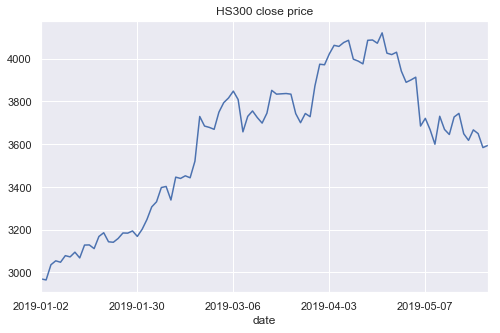

In [4]:
sns.set()
hs300['close'].plot(figsize=(8,5), grid=True, title='HS300 close price')    #画出收盘价

In [5]:
hs300['return'] = np.log(hs300['close']/hs300['close'].shift(1))    #连续收益计算方法

In [6]:
hs300[['close','return']].tail()

,close,return
date,,
2019-05-20,3617.79,-0.008524
2019-05-21,3666.78,0.013451
2019-05-22,3649.38,-0.004757
2019-05-23,3583.96,-0.018089
2019-05-24,3593.91,0.002772


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1D4E72400>,
      dtype=object)

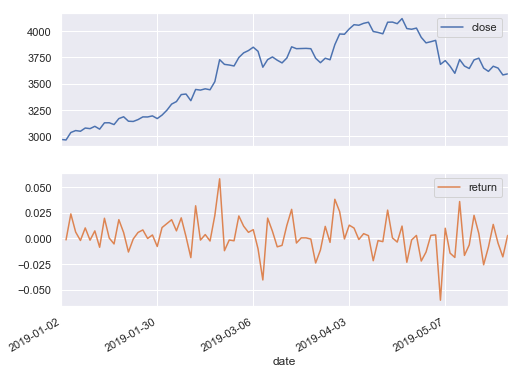

In [7]:
hs300[['close','return']].plot(figsize=(8,6), subplots=True)   #每天的收益，不是累计收益

In [8]:
# 计算股价的移动平均, SMA策略
hs300['SMA20'] = hs300['close'].rolling(window=20).mean()    #window计算活动平均的窗口rolling(window=()).mean()
hs300.tail()

,open,close,high,low,volume,code,return,SMA20
date,,,,,,,,
2019-05-20,3635.74,3617.79,3644.50,3583.83,108963477.0,hs300,-0.008524,3818.3205
2019-05-21,3619.44,3666.78,3690.09,3610.68,111022920.0,hs300,0.013451,3798.0555
2019-05-22,3663.15,3649.38,3679.27,3634.75,98346128.0,hs300,-0.004757,3774.4940
2019-05-23,3629.53,3583.96,3631.47,3578.11,99897781.0,hs300,-0.018089,3752.4115
2019-05-24,3584.90,3593.91,3623.39,3580.79,80934048.0,hs300,0.002772,3731.1565


In [10]:
# 用talib计算激动平均
import talib as ta
hs300['SMA20_talib'] = ta.SMA(np.asarray(hs300['close']),20)     #ta里面有SMA，ta里面有些只支持np.ndarray
hs300.tail()

,open,close,high,low,volume,code,return,SMA20,SMA20_talib
date,,,,,,,,,
2019-05-20,3635.74,3617.79,3644.50,3583.83,108963477.0,hs300,-0.008524,3818.3205,3818.3205
2019-05-21,3619.44,3666.78,3690.09,3610.68,111022920.0,hs300,0.013451,3798.0555,3798.0555
2019-05-22,3663.15,3649.38,3679.27,3634.75,98346128.0,hs300,-0.004757,3774.4940,3774.4940
2019-05-23,3629.53,3583.96,3631.47,3578.11,99897781.0,hs300,-0.018089,3752.4115,3752.4115
2019-05-24,3584.90,3593.91,3623.39,3580.79,80934048.0,hs300,0.002772,3731.1565,3731.1565


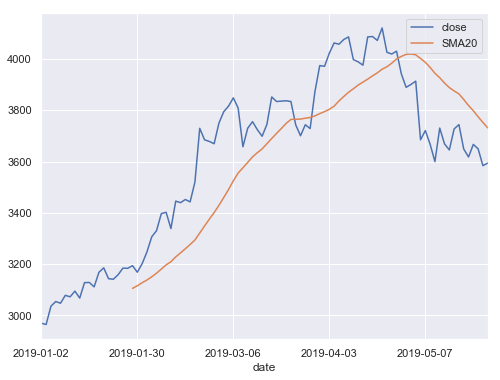

In [11]:
hs300[['close','SMA20']].plot(figsize=(8,6))

In [12]:
hs300['SMA60']=hs300['close'].rolling(window=(60), min_periods=0).mean()    #计算平均的最小时间，在没有到60天前，按照最小时间计算
hs300.head()

,open,close,high,low,volume,code,return,SMA20,SMA20_talib,SMA60
date,,,,,,,,,,
2019-01-02,3017.07,2969.54,3018.78,2958.49,68663021.0,hs300,NaN,NaN,NaN,2969.540000
2019-01-03,2963.02,2964.84,3000.44,2953.25,70867103.0,hs300,-0.001584,NaN,NaN,2967.190000
2019-01-04,2940.19,3035.87,3036.81,2935.83,103318972.0,hs300,0.023675,NaN,NaN,2990.083333
2019-01-07,3055.15,3054.30,3061.75,3035.91,101164359.0,hs300,0.006052,NaN,NaN,3006.137500
2019-01-08,3049.87,3047.70,3055.51,3038.53,86170585.0,hs300,-0.002163,NaN,NaN,3014.450000


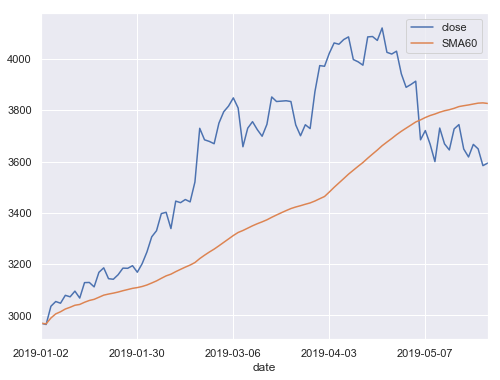

In [13]:
hs300[['close','SMA60']].plot(figsize=(8,6))

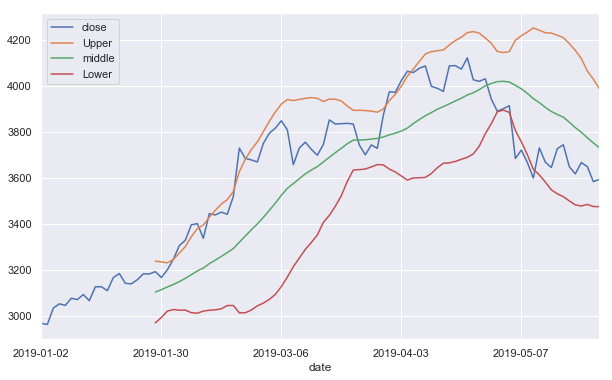

In [14]:
hs300['Upper'],hs300['middle'],hs300['Lower'] = ta.BBANDS(np.asarray(hs300['close']), timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)  #布林带
hs300[['close','Upper','middle','Lower']].plot(figsize=(10,6))

In [19]:
import math
hs300['Mov_Vol'] = hs300['return'].rolling(window=60, min_periods=0).std() * math.sqrt(60)

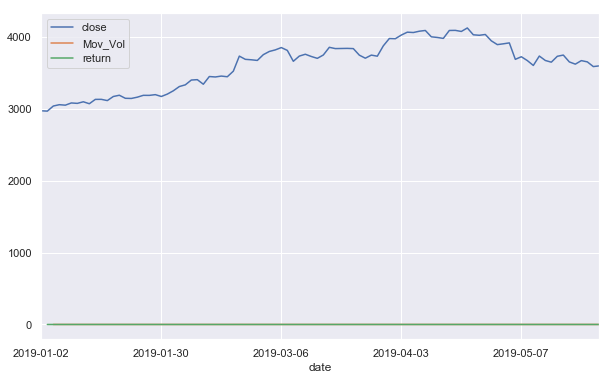

In [21]:
hs300[['close','Mov_Vol','return']].plot(figsize=(10,6))

## 多指标条件选股

In [26]:
hs300 = ts.get_hs300s()['code'].tolist()   #把数据转换成list tolist
hs300[:10]

['600000',
 '600004',
 '600009',
 '600010',
 '600011',
 '600015',
 '600016',
 '600018',
 '600019',
 '600023']

In [29]:
# 获取基本面数据 
# rev：收入同比，profit：利润同比，npr:净利润率 
stock_basics = ts.get_stock_basics()     #获得股票的基本面数据，所有股票的
stock_basics.reset_index(inplace=True)    #返回的是code作为索引的dataframe ，将code换成0，1，2...的索引
data1 = stock_basics.loc[stock_basics['code'].isin(hs300),    #dataframe索引 ，loc通过标签索引，行标签，列标签 ；isin()在不再某个列表里面
                        ['code','name','industry','pe','pb','esp','rev','profit',]]
data1.columns =['代码','名称','行业','PE','PB','EPS','收入%','利润%']
data1.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%
105,601901,方正证券,证券,26.86,1.64,0.071,42.51,85.66
135,603160,汇顶科技,元器件,30.73,11.09,0.908,114.39,2039.95
136,603833,欧派家居,家居用品,126.88,6.10,0.219,15.57,25.14
140,300017,网宿科技,电信运营,58.70,2.99,0.045,8.75,-49.18
141,000157,中联重科,工程机械,10.42,1.06,0.130,41.76,165.98
150,600816,安信信托,多元金融,23.04,2.25,0.057,-66.75,-70.44
183,002415,海康威视,电器仪表,37.53,5.88,0.170,6.17,-15.41
184,000625,长安汽车,汽车整车,0.00,0.75,-0.436,-20.00,-250.62
192,000338,潍柴动力,汽车配件,8.80,2.17,0.327,15.30,34.99
226,002602,世纪华通,汽车配件,54.01,3.07,0.090,57.76,-37.38


In [32]:
# 获得盈利能力数据
stock_profit = ts.get_profit_data(2019,1)     #获得股票的基本面数据，所有股票的

[Getting data:]#############################################################

In [33]:
stock_profit.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600083,博信股份,84.28,25.88,7.0378,32.1465,0.1397,124.1755,0.5398
1,600319,亚星化学,25.79,2.44,12.3502,12.7191,0.0403,521.0562,1.6510
2,002234,民和股份,25.61,52.74,58.7475,385.7934,1.2772,731.4864,2.4217
3,002458,益生股份,19.96,58.62,61.9964,381.9419,1.1320,651.4869,1.9310
4,300776,帝尔激光,18.97,45.25,54.8513,74.8605,1.5096,165.4311,3.3360


In [34]:
data2 = stock_profit.loc[stock_profit['code'].isin(hs300),    #dataframe索引 ，loc通过标签索引，行标签，列标签 ；isin()在不再某个列表里面
                        ['code','roe','gross_profit_rate','net_profit_ratio']]
data2.columns =['代码','ROE','毛利率','净利率']
data2 = round(data2, 2)
data2.head(10)

,代码,ROE,毛利率,净利率
13,601888,12.46,49.45,16.84
15,600809,12.35,71.94,21.62
19,600570,11.06,96.79,67.18
23,300122,10.72,39.88,21.89
24,002304,10.62,72.29,36.92
33,603288,9.62,45.78,26.90
42,000858,9.25,75.78,36.81
45,600519,9.04,92.11,51.84
47,603160,9.02,61.43,33.81
48,000895,8.96,21.00,10.69


In [35]:
# 获取成长能力数据 
# nprg:净利润增长率  nav:净资产增长率
stock_growth = ts.get_growth_data(2019,1)

[Getting data:]#############################################################

In [36]:
data3 = stock_growth.loc[stock_growth['code'].isin(hs300),
                        ['code','nprg']]
data3.columns = ['代码','NI增长率']
data3 = round(data3, 2)
data3.head(10)

,代码,NI增长率
21,603160,2039.95
62,601555,872.86
92,600570,609.32
147,600739,356.89
157,002797,320.23
184,002673,257.97
199,002594,236.37
205,600909,222.56
232,000415,184.75
234,600958,182.25


In [42]:
from functools import reduce  

import pandas as pd 

#数据合并
merge = lambda x,y: pd.merge(x, y, how='left', on='代码')    #同时套用lambda和reduce函数， merge写成了一个lambda函数
data = reduce(merge, [data1, data2, data3])   #功能跟lambda函数差不多
data.drop_duplicates(inplace=True)
data.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI增长率
0,601901,方正证券,证券,26.86,1.64,0.071,42.51,85.66,1.53,40.97,31.85,87.87
1,603160,汇顶科技,元器件,30.73,11.09,0.908,114.39,2039.95,9.02,61.43,33.81,2039.95
2,603833,欧派家居,家居用品,126.88,6.10,0.219,15.57,25.14,1.20,34.22,4.17,25.14
3,300017,网宿科技,电信运营,58.70,2.99,0.045,8.75,-49.18,1.27,28.30,6.65,-46.72
4,000157,中联重科,工程机械,10.42,1.06,0.130,41.76,165.98,2.55,30.01,11.11,164.47
5,600816,安信信托,多元金融,23.04,2.25,0.057,-66.75,-70.44,2.43,80.06,59.04,-70.46
6,002415,海康威视,电器仪表,37.53,5.88,0.170,6.17,-15.41,3.91,44.82,15.45,-14.83
7,000625,长安汽车,汽车整车,0.00,0.75,-0.436,-20.00,-250.62,-4.71,5.02,-13.09,-254.95
8,000338,潍柴动力,汽车配件,8.80,2.17,0.327,15.30,34.99,6.15,21.66,5.73,31.71
9,002602,世纪华通,汽车配件,54.01,3.07,0.090,57.76,-37.38,1.42,32.50,9.04,-37.39


In [40]:
# 另一种方法
hs300 = pd.merge(data1, data2, how='left', on='代码')
hs300.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率
0,601901,方正证券,证券,26.86,1.64,0.071,42.51,85.66,1.53,40.97,31.85
1,603160,汇顶科技,元器件,30.73,11.09,0.908,114.39,2039.95,9.02,61.43,33.81
2,603833,欧派家居,家居用品,126.88,6.10,0.219,15.57,25.14,1.20,34.22,4.17
3,300017,网宿科技,电信运营,58.70,2.99,0.045,8.75,-49.18,1.27,28.30,6.65
4,000157,中联重科,工程机械,10.42,1.06,0.130,41.76,165.98,2.55,30.01,11.11
5,600816,安信信托,多元金融,23.04,2.25,0.057,-66.75,-70.44,2.43,80.06,59.04
6,002415,海康威视,电器仪表,37.53,5.88,0.170,6.17,-15.41,3.91,44.82,15.45
7,000625,长安汽车,汽车整车,0.00,0.75,-0.436,-20.00,-250.62,-4.71,5.02,-13.09
8,000338,潍柴动力,汽车配件,8.80,2.17,0.327,15.30,34.99,6.15,21.66,5.73
9,002602,世纪华通,汽车配件,54.01,3.07,0.090,57.76,-37.38,1.42,32.50,9.04


In [41]:
hs300 = pd.merge(hs300,data3,how='left',on='代码')
hs300.drop_duplicates(inplace=True)      #去掉重复的数据
hs300.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI增长率
0,601901,方正证券,证券,26.86,1.64,0.071,42.51,85.66,1.53,40.97,31.85,87.87
1,603160,汇顶科技,元器件,30.73,11.09,0.908,114.39,2039.95,9.02,61.43,33.81,2039.95
2,603833,欧派家居,家居用品,126.88,6.10,0.219,15.57,25.14,1.20,34.22,4.17,25.14
3,300017,网宿科技,电信运营,58.70,2.99,0.045,8.75,-49.18,1.27,28.30,6.65,-46.72
4,000157,中联重科,工程机械,10.42,1.06,0.130,41.76,165.98,2.55,30.01,11.11,164.47


In [43]:
data['估值系数'] = data['PE'] * data['PB']
data = round(data, 2)
data.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI增长率,估值系数
0,601901,方正证券,证券,26.86,1.64,0.07,42.51,85.66,1.53,40.97,31.85,87.87,44.05
1,603160,汇顶科技,元器件,30.73,11.09,0.91,114.39,2039.95,9.02,61.43,33.81,2039.95,340.80
2,603833,欧派家居,家居用品,126.88,6.10,0.22,15.57,25.14,1.20,34.22,4.17,25.14,773.97
3,300017,网宿科技,电信运营,58.70,2.99,0.04,8.75,-49.18,1.27,28.30,6.65,-46.72,175.51
4,000157,中联重科,工程机械,10.42,1.06,0.13,41.76,165.98,2.55,30.01,11.11,164.47,11.05
5,600816,安信信托,多元金融,23.04,2.25,0.06,-66.75,-70.44,2.43,80.06,59.04,-70.46,51.84
6,002415,海康威视,电器仪表,37.53,5.88,0.17,6.17,-15.41,3.91,44.82,15.45,-14.83,220.68
7,000625,长安汽车,汽车整车,0.00,0.75,-0.44,-20.00,-250.62,-4.71,5.02,-13.09,-254.95,0.00
8,000338,潍柴动力,汽车配件,8.80,2.17,0.33,15.30,34.99,6.15,21.66,5.73,31.71,19.10
9,002602,世纪华通,汽车配件,54.01,3.07,0.09,57.76,-37.38,1.42,32.50,9.04,-37.39,165.81


In [45]:
# 条件选股
data_filtered = data.loc[(data['估值系数']<60) & (data['ROE']>5),
                        ['代码','名称','PE','PB','估值系数','ROE','收入%']]
print('筛选结果共%d只个股'%len(data_filtered))

筛选结果共21只个股


In [46]:
# 按选定字段进行排序
data_filtered.sort_values(['估值系数'], ascending=True, inplace=True)   #sort_index根据索引来排序;sort_values根据某一列的值来选股票
data_filtered

,代码,名称,PE,PB,估值系数,ROE,收入%
70,600606,绿地控股,4.63,1.13,5.23,5.91,20.91
65,601628,中国人寿,6.87,2.00,13.74,7.14,17.87
176,601225,陕西煤业,8.19,1.73,14.17,5.27,14.44
51,600585,海螺水泥,8.53,1.75,14.93,5.11,62.53
224,600340,华夏幸福,7.29,2.32,16.91,6.41,8.51
31,601318,中国平安,7.68,2.33,17.89,7.59,21.81
8,000338,潍柴动力,8.80,2.17,19.10,6.15,15.30
42,600031,三一重工,7.82,2.60,20.33,8.31,75.14
258,600398,海澜之家,7.84,2.81,22.03,8.61,5.23
237,600516,方大炭素,11.00,2.34,25.74,5.32,-48.86


In [48]:
#数据分类
def map_func(x):
    """
    作为apply函数的参数传入
    ：param x: df中一行或一列数据，取决于apply函数的参数axis
    ：return：将每个计算结果组合，返回一个Series
    """
    if x['ROE'] > 5:
        return '成长'
    elif x['ROE'] >= 0:
        return '低成长'
    elif x['ROE'] < 0:
        return '亏损'
    
data['成长性'] = data.apply(map_func, axis=1)     #apply函数将data里的每个函数都传递到map_func
data.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI增长率,估值系数,成长性
0,601901,方正证券,证券,26.86,1.64,0.07,42.51,85.66,1.53,40.97,31.85,87.87,44.05,低成长
1,603160,汇顶科技,元器件,30.73,11.09,0.91,114.39,2039.95,9.02,61.43,33.81,2039.95,340.80,成长
2,603833,欧派家居,家居用品,126.88,6.10,0.22,15.57,25.14,1.20,34.22,4.17,25.14,773.97,低成长
3,300017,网宿科技,电信运营,58.70,2.99,0.04,8.75,-49.18,1.27,28.30,6.65,-46.72,175.51,低成长
4,000157,中联重科,工程机械,10.42,1.06,0.13,41.76,165.98,2.55,30.01,11.11,164.47,11.05,低成长
5,600816,安信信托,多元金融,23.04,2.25,0.06,-66.75,-70.44,2.43,80.06,59.04,-70.46,51.84,低成长
6,002415,海康威视,电器仪表,37.53,5.88,0.17,6.17,-15.41,3.91,44.82,15.45,-14.83,220.68,低成长
7,000625,长安汽车,汽车整车,0.00,0.75,-0.44,-20.00,-250.62,-4.71,5.02,-13.09,-254.95,0.00,亏损
8,000338,潍柴动力,汽车配件,8.80,2.17,0.33,15.30,34.99,6.15,21.66,5.73,31.71,19.10,成长
9,002602,世纪华通,汽车配件,54.01,3.07,0.09,57.76,-37.38,1.42,32.50,9.04,-37.39,165.81,低成长


In [51]:
# 对高成长分类按照’烟蒂系数‘做升序排序
data_growth = data[data['成长性'] == '成长'].sort_values(['估值系数'], ascending=True)
data_growth.head(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI增长率,估值系数,成长性
70,600606,绿地控股,全国地产,4.63,1.13,0.36,20.91,26.29,5.91,15.20,4.87,40.68,5.23,成长
65,601628,中国人寿,保险,6.87,2.00,0.92,17.87,92.59,7.14,10.68,8.33,91.79,13.74,成长
176,601225,陕西煤业,煤炭开采,8.19,1.73,0.28,14.44,-2.35,5.27,44.28,19.26,-11.81,14.17,成长
51,600585,海螺水泥,水泥,8.53,1.75,1.15,62.53,27.27,5.11,30.83,19.93,26.56,14.93,成长
224,600340,华夏幸福,区域地产,7.29,2.32,0.97,8.51,29.61,6.41,65.29,28.79,32.96,16.91,成长
31,601318,中国平安,保险,7.68,2.33,2.55,21.81,77.10,7.59,16.74,12.03,70.37,17.89,成长
8,000338,潍柴动力,汽车配件,8.80,2.17,0.33,15.30,34.99,6.15,21.66,5.73,31.71,19.10,成长
42,600031,三一重工,工程机械,7.82,2.60,0.41,75.14,114.71,8.31,30.72,15.12,114.14,20.33,成长
258,600398,海澜之家,服饰,7.84,2.81,0.27,5.23,6.96,8.61,43.59,19.86,6.78,22.03,成长
237,600516,方大炭素,矿物制品,11.00,2.34,0.40,-48.86,-62.36,5.32,52.31,39.59,-63.54,25.74,成长


In [52]:
def group_func(df):
    """
    作为groupby.apply函数的参数传入
    ：param df: 实际上是经过聚合后的单一类的dataframe
    ：return：返回df按照‘烟蒂系数’排序后的前三位
    """
    return df.sort_values(['估值系数'], ascending = True)[:2]

#按‘成长性’分组，筛选每个分组中‘烟蒂系数'最低的三个个股
data_grouped = data.groupby('成长性').apply(group_func)
data_grouped

代码     名称    行业    PE    PB   EPS    收入%     利润%   ROE    毛利率  \
成长性                                                                          
亏损  7    000625   长安汽车  汽车整车  0.00  0.75 -0.44 -20.00 -250.62 -4.71   5.02   
    13   000792  *ST盐湖  化工原料  0.00  1.40 -0.10  53.75    3.20 -1.60  32.50   
低成长 100  600016   民生银行    银行  4.23  0.63  0.36  19.35    5.69  3.61  43.81   
    148  000415   渤海租赁  多元金融  4.71  0.65  0.20   6.55  133.79  3.47  45.37   
成长  70   600606   绿地控股  全国地产  4.63  1.13  0.36  20.91   26.29  5.91  15.20   
    65   601628   中国人寿    保险  6.87  2.00  0.92  17.87   92.59  7.14  10.68   

           净利率   NI增长率   估值系数  成长性  
成长性                                 
亏损  7   -13.09 -254.95   0.00   亏损  
    13   -6.37     NaN   0.00   亏损  
低成长 100  36.00    5.57   2.66  低成长  
    148  16.04  184.75   3.06  低成长  
成长  70    4.87   40.68   5.23   成长  
    65    8.33   91.79  13.74   成长

In [53]:
data_grouped2 = data.groupby('行业').apply(group_func)
data_grouped2

代码     名称    行业     PE     PB   EPS     收入%     利润%   ROE  \
行业                                                                        
专用机械 209  300024    机器人  专用机械  89.29   3.87  0.04    5.11   10.81  1.08   
中成药  170  603858   步长制药   中成药  19.73   1.62  0.32   18.61   37.79  2.04   
     149  600332    白云山   中成药  11.47   2.79  0.86  161.32   55.42  6.09   
乳制品  150  600887   伊利股份   乳制品  20.03   6.91  0.37   17.89    8.36  8.64   
互联网  291  002555   三七互娱   互联网  14.39   4.08  0.21   95.46   10.80  7.08   
     192  002558   巨人网络   互联网  33.50   4.04  0.14  -36.42  -19.48  3.01   
仓储物流 193  600233   圆通速递  仓储物流  23.48   3.06  0.13   20.65   15.66  3.07   
     26   002468   申通快递  仓储物流  21.62   3.94  0.27   55.10    7.22  4.55   
保险   65   601628   中国人寿    保险   6.87   2.00  0.92   17.87   92.59  7.14   
     31   601318   中国平安    保险   7.68   2.33  2.55   21.81   77.10  7.59   
元器件  233  300433   蓝思科技   元器件   0.00   1.70 -0.02    6.95 -188.18 -0.57   
     264  002456    欧菲光   元器件   0.00   2.60 -0.10   40.98 -186.86 -3.07   
全国地产 70   600606   绿地控股  全国地产   4.63   1.13  0.36   20.91   26.29  5.91   
     50   000402  金 融 街  全国地产   9.27   0.70  0.20   13.67   11.49  1.87   
其他商业 286  601828    美凯龙  其他商业   7.92   0.96  0.37   22.37   11.14  3.02   
其他建材 283  000786   北新建材  其他建材  24.62   2.21  0.19   -2.83  -33.12  2.24   
     116  002271   东方雨虹  其他建材  58.29   3.89  0.08   41.01   28.89  1.58   
农业综合 287  002714   牧原股份  农业综合   0.00  12.15 -0.26   10.62 -497.64 -4.60   
农药化肥 253  000553   安道麦A  农药化肥  17.29   1.14  0.15    4.43  -81.95  1.64   
     260  000408   藏格控股  农药化肥  30.40   1.88  0.06   39.06   46.29  1.54   
化学制药 196  002001  新 和 成  化学制药  19.63   2.41  0.24  -39.71  -65.82  3.06   
     210  600196   复星医药  化学制药  22.58   2.24  0.28   17.67    0.92  2.48   
化工原料 13   000792  *ST盐湖  化工原料   0.00   1.40 -0.10   53.75    3.20 -1.60   
     301  002450  *ST康得  化工原料   0.00   0.60 -0.09  -84.87 -142.77 -1.71   
化纤   94   000703   恒逸石化    化纤  21.48   1.73  0.15   25.93  -42.88  2.01   
     207  002493   荣盛石化    化纤  29.56   3.32  0.10   -9.08   -4.79  2.81   
区域地产 224  600340   华夏幸福  区域地产   7.29   2.32  0.97    8.51   29.61  6.41   
     273  000671  阳 光 城  区域地产  20.39   1.37  0.05   39.66   37.15  1.32   
医疗保健 126  000503   国新健康  医疗保健   0.00  14.56 -0.06   38.94   15.13 -4.30   
     242  002044   美年健康  医疗保健   0.00   6.72 -0.04    4.21   -6.45 -1.83   
...          ...    ...   ...    ...    ...   ...     ...     ...   ...   
空运   24   600029   南方航空    空运   8.28   1.36  0.22   10.36    4.13  4.12   
综合类  240  000839   中信国安   综合类  90.99   1.62  0.01  -14.62   -6.58   NaN   
航空   255  600372   中航电子    航空   0.00   3.60 -0.02   39.91   37.12 -0.49   
     268  600038   中直股份    航空  76.00   3.07  0.13   11.50   11.50  1.00   
船舶   225  601989   中国重工    船舶  53.83   1.34  0.02   -0.82   92.90  0.62   
装修装饰 185  002081  金 螳 螂  装修装饰  10.98   1.91  0.22   19.57    8.65  4.34   
证券   163  000776   广发证券    证券   8.54   1.12  0.38   77.02   91.25  3.28   
     180  601788   光大证券    证券   9.45   1.02  0.29   46.49   80.09  2.70   
超市连锁 234  601933   永辉超市  超市连锁  21.10   4.62  0.12   18.48   50.28  5.47   
路桥   183  001965   招商公路    路桥  11.84   1.04  0.17   29.07   16.92  2.15   
软件服务 295  000938   紫光股份  软件服务  36.17   2.03  0.26   20.85   52.66  1.40   
     246  002065   东华软件  软件服务  36.18   2.40  0.05   17.00   15.06  1.65   
软饮料  89   603156   养元饮品   软饮料   9.90   2.62  0.81  -12.53   -8.56  6.62   
运输设备 165  601766   中国中车  运输设备  31.40   1.71  0.06   20.49   40.08  1.36   
通信设备 236  600522   中天科技  通信设备  13.15   1.34  0.17   63.40   14.99  2.54   
     262  600487   亨通光电  通信设备  16.15   2.29  0.24    7.45   -5.18  3.47   
铁路   84   601006   大秦铁路    铁路   7.62   1.11  0.27    6.99   -4.06  3.62   
     103  601333   广深铁路    铁路  14.25   0.76  0.06    4.91  -12.49  1.33   
铜    162  600362   江西铜业     铜  16.75   0.98  0.21   -3.46   -3.08  1.47   
     186  000630   铜陵有色     铜  22.39   1.39  0.03   30.67   38.14   NaN   
铝    88   600219   南山铝业     铝  26.73   